In [561]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Dataset

In [492]:
df = pd.read_csv(r"F:\Portofolio\Analytics-Showcase\StudentAdmission\Data\RawData\student_admission_record_dirty.csv")

In [494]:
df.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.90,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.73,Karachi,NaN
2,Bushra,17.0,Male,89.0,NaN,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.13,Lahore,NaN


In [496]:
df.count()

Name                      147
Age                       147
Gender                    147
Admission Test Score      146
High School Percentage    146
City                      147
Admission Status          147
dtype: int64

In [498]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    147 non-null    object 
 1   Age                     147 non-null    float64
 2   Gender                  147 non-null    object 
 3   Admission Test Score    146 non-null    float64
 4   High School Percentage  146 non-null    float64
 5   City                    147 non-null    object 
 6   Admission Status        147 non-null    object 
dtypes: float64(3), object(4)
memory usage: 8.7+ KB


In [500]:
df.describe()

,Age,Admission Test Score,High School Percentage
count,147.000000,146.000000,146.000000
mean,19.680272,77.657534,75.684726
std,4.540512,16.855343,17.368014
min,-1.000000,-5.000000,-10.000000
25%,18.000000,68.250000,65.052500
50%,20.000000,79.000000,77.545000
75%,22.000000,89.000000,88.312500
max,24.000000,150.000000,110.500000


Terdapat outlier data yang dimana Admission Test Score (ATS) dan High School Percentage (HSP) yang biasanyaa ditemukan ini memiliki range nilai 0-100, akan tetapi pada dataset ini mencakup nilai outlier yang dimana dari -10 hingga 150.

# Handle Outlier Data

In [504]:
# Age (Range asumsi anak yang mengambil test sekitar 10-25 Tahun)
df["Age"] = df["Age"].clip(lower=10, upper=25)

# Admission Test Score
df["Admission Test Score"] = df["Admission Test Score"].clip(lower=0, upper=100)

# High Score Percentage
df["High School Percentage"] = df["High School Percentage"].clip(lower=0, upper=100)

In [506]:
df.describe()

,Age,Admission Test Score,High School Percentage
count,147.000000,146.000000,146.000000
mean,20.054422,77.342466,75.681301
std,3.006346,15.668743,16.918543
min,10.000000,0.000000,0.000000
25%,18.000000,68.250000,65.052500
50%,20.000000,79.000000,77.545000
75%,22.000000,89.000000,88.312500
max,24.000000,100.000000,100.000000


Pada data sebelumnya terdapat beberapa nilai yang tidak masuk akal (seperti -10, -5, 110, 150), yang bisa dianggap sebagai outlier atau kesalahan input.
Daripada menghapus baris-baris tersebut (yang bisa memicu pertanyaan dari pihak siswa atau pemilik data), saya menggunakan fungsi clip() untuk membatasi nilai agar tetap dalam rentang yang wajar, yaitu antara 0 dan 100.

# Data Preprocessing & Cleaning

### Duplicate Data

In [511]:
# Menghitung jumlah data yang duplikat
df.duplicated().sum()

6

In [513]:
# Menampilkan semua baris yang memiliki duplikat persis (seluruh kolom sama), termasuk baris pertamanya
duplicate = df[df.duplicated(keep=False)]

duplicate

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
3,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
9,Kamran,18.0,Male,53.0,98.98,Multan,Rejected
13,Ahmed,21.0,Male,62.0,79.03,Karachi,Accepted
22,Kamran,18.0,Male,53.0,98.98,Multan,Rejected
36,Ayesha,24.0,Male,94.0,98.43,Multan,Rejected
52,Ahmed,21.0,Male,62.0,79.03,Karachi,Accepted
61,Hamza,22.0,Male,99.0,86.58,Multan,Accepted
69,Tuba,17.0,Female,75.0,78.43,Peshawar,Accepted
88,Aliya,17.0,Male,55.0,85.29,Karachi,Rejected
110,Hamza,22.0,Male,99.0,86.58,Multan,Accepted


Diketahui bahwa ID 9 dan 22, ID 61 dan 110, dan sisa data duplikat lainnya memiliki data yang persis identikal. Sehingga disini agar saya menghindari redudansi data, maka saya hanya akana menggunakan data record yang pertama kali masuk dari setiap data yang duplikat dan sisanya akan dibuang.

In [516]:
#Menghapus data yang duplikat secara langsung pada dataset agar tersimpan hasilnya dan bisa dilanjutkan preprocessing
df.drop_duplicates(inplace=True)

#Alternatif
df = df.drop_duplicates()

In [518]:
df.duplicated().sum()

0

### NULL Value

In [521]:
# Menghitung jumlah data yang hilang
df.isnull().sum()

Name                      10
Age                       10
Gender                    10
Admission Test Score      11
High School Percentage    11
City                      10
Admission Status          10
dtype: int64

Karena ini adalah data record sekolah, sehingga kita perlu mempertahankan beberapa kolom penting seperti Admission Test Score dan High School Percentage

In [524]:
# Mengubah data yang hilang pada Name menjadi Unknown
df["Name"] = df["Name"].fillna("Unknown")

In [526]:
# Data umur yang hilang ini saya gunakan median agar main aman
df["Age"] = df["Age"].fillna(df["Age"].median())

In [528]:
# Mengetahui gender yang paling banyak ketika pendaftaran
df["Gender"].value_counts()

Gender
Female    82
Male      59
Name: count, dtype: int64

In [530]:
# Menggunakan Mode untuk mengisi kolom gender yang hilang, sehingga akan dikatakan gender yang paling banyak ditemukan
df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

In [532]:
# Menangani data hilang yang penting dalam case ini yakni kolom Admission Test Score dan High School Percentage karena value datanya adalah merepresentasikan hasil ujian dari siswa sendiri

# Admission Test Score
df["Admission Test Score"] = df["Admission Test Score"].fillna(df["Admission Test Score"].median())

# High School Percentage

df["High School Percentage"] = df["High School Percentage"].fillna(df["High School Percentage"].median())

In [534]:
# Skewness Value
print("Nilai Skewness ATS:", df["Admission Test Score"].skew())
print("Nilai Skewness HSP:", df["High School Percentage"].skew())

Nilai Skewness ATS: -1.167148720240807
Nilai Skewness HSP: -1.2594949835918587


Metode skewness diatas ini untuk membantu dalam memilih metode apa yang dapat digunakan untuk menangani nilai yang kosong pada kolom Admission Test Score (ATS) dan juga High School Percentage (HSP), apakah menggunakan median atau mean.


In [537]:
# Mengetahui data kota apa yang paling banyak mendaftar
df["City"].value_counts()

City
Quetta        30
Karachi       26
Multan        18
Islamabad     17
Lahore        17
Peshawar      17
Rawalpindi    16
Name: count, dtype: int64

In [539]:
# Sama seperti gender, dimana data kota yang hilang akan dianggap berasal dari kota yang paling banyak
df["City"] = df["City"].fillna(df["City"].mode()[0])

In [541]:
# Mengisi data NULL paada Admission Status dengan Unknown
df["Admission Status"] = df["Admission Status"].fillna("Unknown") 

Karena saya disini memperuntukan output dashboard, tentu saya menggunaakan data yang hilang pada Admission Status ini dengan Unknown ketimbang menghilangkannya, karena hal ini bisa dijelaskan ada data yang hilang pada kolom ini. Terkecuali saya ingin menggunakan kolom ini untuk labeling pada Machine Learning, maka tahapannya akan berbeda

### Consistency Words

In [545]:
df.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24.0,Female,50.0,68.900,Quetta,Rejected
1,Waqar,21.0,Female,99.0,60.730,Karachi,Unknown
2,Bushra,17.0,Male,89.0,76.195,Islamabad,Accepted
3,Aliya,17.0,Male,55.0,85.290,Karachi,Rejected
4,Bilal,20.0,Male,65.0,61.130,Lahore,Unknown


In [547]:
for col in ["Gender", "City", "Admission Status"]:
    print(col, ":", df[col].unique())

Gender : ['Female' 'Male']
City : ['Quetta' 'Karachi' 'Islamabad' 'Lahore' 'Multan' 'Peshawar' 'Rawalpindi']
Admission Status : ['Rejected' 'Unknown' 'Accepted']


### Switching Dtype

In [565]:
df["Age"] = df["Age"].astype(int)

In [567]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 0 to 156
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    151 non-null    object 
 1   Age                     151 non-null    int32  
 2   Gender                  151 non-null    object 
 3   Admission Test Score    151 non-null    float64
 4   High School Percentage  151 non-null    float64
 5   City                    151 non-null    object 
 6   Admission Status        151 non-null    object 
dtypes: float64(2), int32(1), object(4)
memory usage: 8.8+ KB


In [569]:
df.head()

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
0,Shehroz,24,Female,50.0,68.900,Quetta,Rejected
1,Waqar,21,Female,99.0,60.730,Karachi,Unknown
2,Bushra,17,Male,89.0,76.195,Islamabad,Accepted
3,Aliya,17,Male,55.0,85.290,Karachi,Rejected
4,Bilal,20,Male,65.0,61.130,Lahore,Unknown


# Explanatory Data Analysis

### Plot & Correlation

In [572]:
df.sample(5)

,Name,Age,Gender,Admission Test Score,High School Percentage,City,Admission Status
18,Maryam,19,Female,74.0,70.26,Lahore,Accepted
140,Feroze,23,Female,51.0,92.36,Rawalpindi,Accepted
10,Shafiq,17,Male,78.0,0.00,Quetta,Rejected
72,Unknown,21,Male,95.0,84.20,Islamabad,Unknown
151,Asad,20,Female,95.0,52.40,Rawalpindi,Rejected


In [742]:
correlation = df[["Age", "Admission Test Score", "High School Percentage"]].corr()

correlation

,Age,Admission Test Score,High School Percentage
Age,1.000000,-0.006835,0.205833
Admission Test Score,-0.006835,1.000000,-0.127921
High School Percentage,0.205833,-0.127921,1.000000


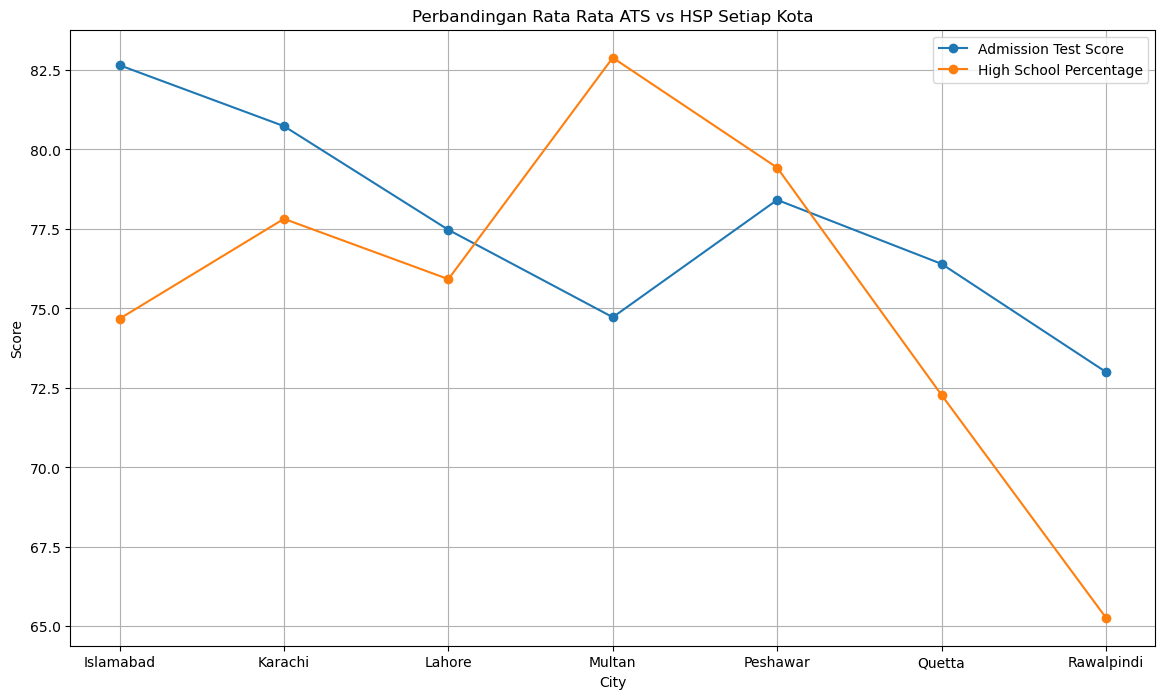

In [748]:
#Groupping
avg_ats_city = df.groupby("City")["Admission Test Score"].mean()
avg_hsp_city = df.groupby("City")["High School Percentage"].mean()

#Plottingan
plt.figure(figsize=(14,8))
plt.plot(avg_ats_city.index, avg_ats_city.values, marker='o', label="Admission Test Score")
plt.plot(avg_hsp_city.index, avg_hsp_city.values, marker='o', label="High School Percentage")
plt.title("Perbandingan Rata Rata ATS vs HSP Setiap Kota")
plt.ylabel("Score")
plt.xlabel("City")
plt.legend()
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Persentase dari Admission Status')

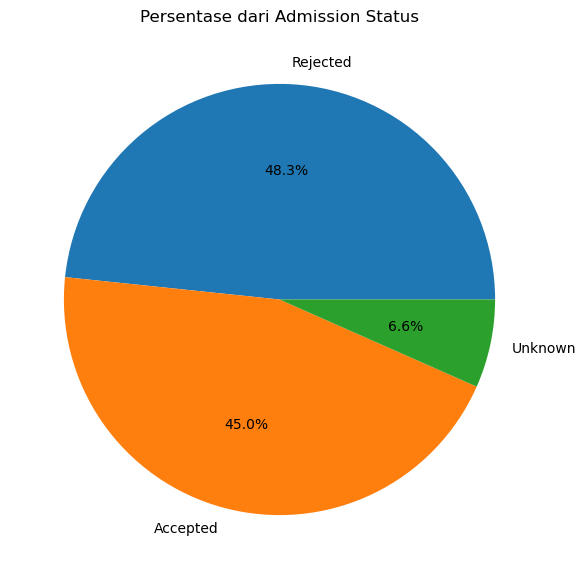

In [670]:
status_count = df["Admission Status"].value_counts()

#print(status_count)
#print(status_count.index)

#Plottingan
plt.figure(figsize=(11,7))
plt.pie(status_count, labels=status_count.index, autopct='%1.1f%%')
plt.title("Persentase dari Admission Status")

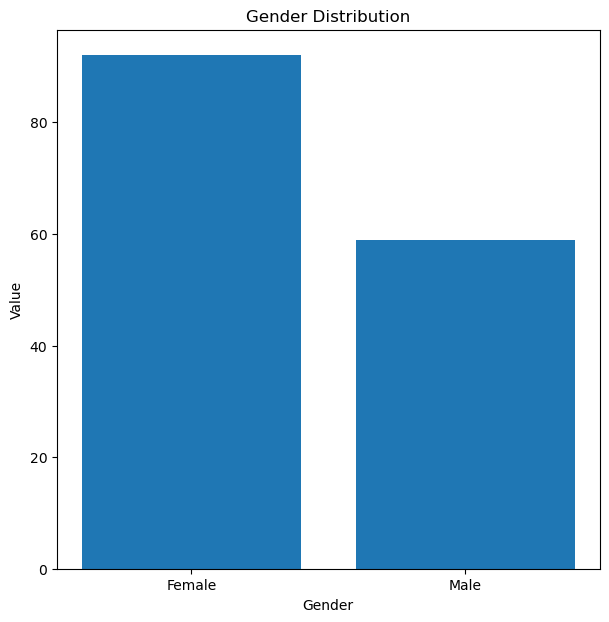

In [680]:
gender_count = df["Gender"].value_counts()

#Plottingan
plt.figure(figsize=(7,7))
plt.bar(gender_count.index, gender_count.values)
plt.title("Gender Distribution")
plt.ylabel("Value")
plt.xlabel("Gender")
plt.show()

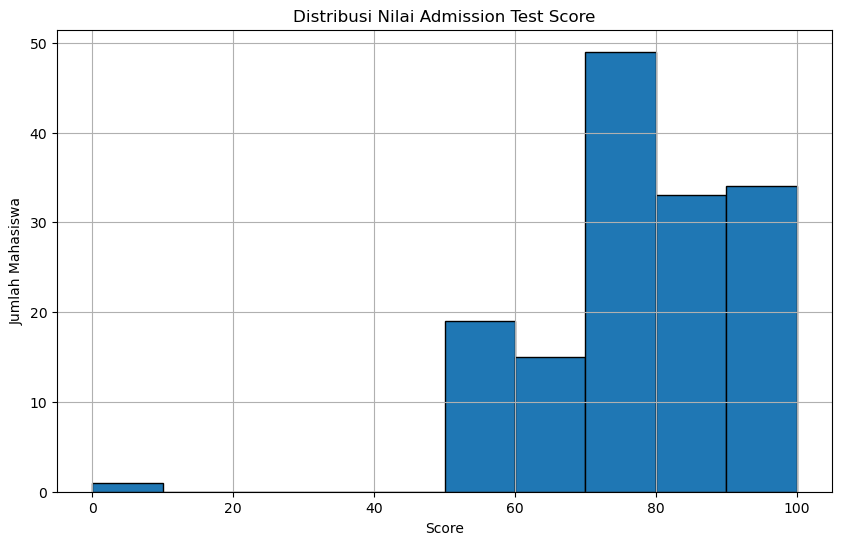

In [760]:
plt.figure(figsize=(10,6))
plt.hist(df["Admission Test Score"], edgecolor='black')
plt.title("Distribusi Nilai Admission Test Score")
plt.xlabel("Score")
plt.ylabel("Jumlah Mahasiswa")
plt.grid(True)
plt.show()

In [752]:
pd.crosstab(df["City"], df["Admission Status"])

Admission Status,Accepted,Rejected,Unknown
City,,,
Islamabad,7,9,1
Karachi,9,15,2
Lahore,12,4,1
Multan,9,9,0
Peshawar,6,11,0
Quetta,17,19,4
Rawalpindi,8,6,2


### Seaborn Test

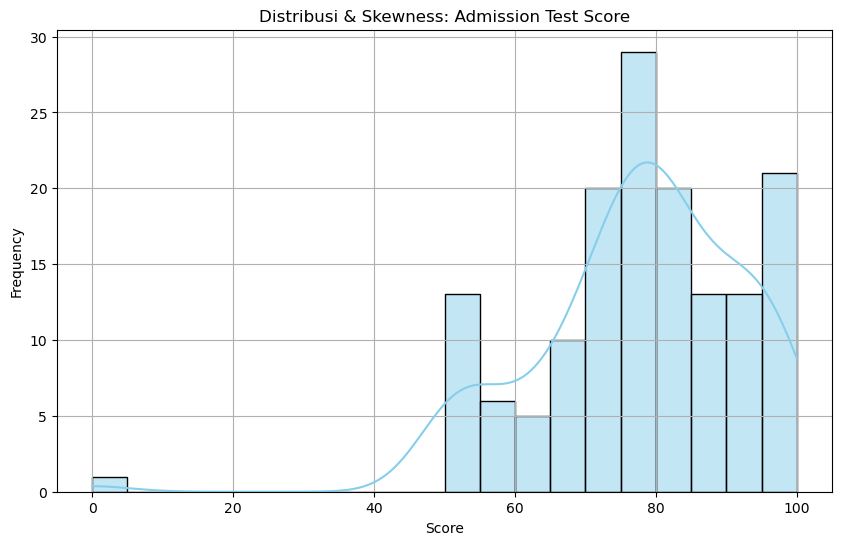

In [728]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(df["Admission Test Score"], kde=True, bins=20, color='skyblue')
plt.title("Distribusi & Skewness: Admission Test Score")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Distribusi ATS per Kota')

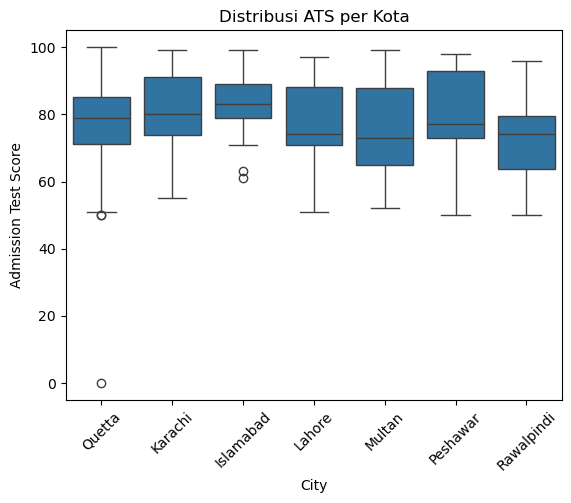

In [734]:
sns.boxplot(x="City", y="Admission Test Score", data=df)
plt.xticks(rotation=45)
plt.title("Distribusi ATS per Kota")

<Axes: xlabel='Admission Status', ylabel='count'>

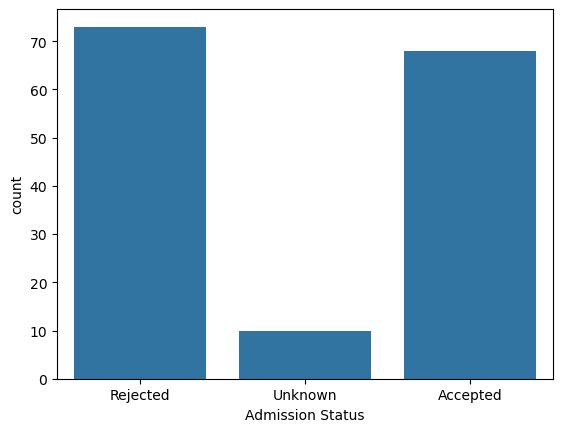

In [750]:
sns.countplot(data=df, x="Admission Status")

# Load to Local Folder

In [774]:
import os
print(os.getcwd())

F:\Portofolio\Analytics-Showcase\StudentAdmission\Notebooks


In [776]:
df.to_csv("../Data/ProcessedData/SA_Data_Cleaned.csv", index=False)